Name: Chai Yong Xin
<br>
Matrix No: 17219908
<br>
Assignment: Step3

Title: Predict the Outbreak of COVID-19 using Machine Learning

Assignment Field: Regression

Data source (URL of dataset website): https://data.world/wnarifin/covid-19-my

Objectives:
1. To investigate the effectiveness of government policies to the COVID-19.
2. To predict the growth and trend of COVID-19.

GitHub: https://github.com/YongXinChai/Predict-the-Outbreak-of-COVID-19-using-Machine-Learning

### Import Library

In [201]:
import pandas as pd # the data structure and analysis library
import matplotlib 
import matplotlib.pyplot as plt  # the graphing library


### Import Covid-19 Data

In [202]:
# Import covid-19 Malaysia State Dataset
df = pd.read_csv("Datasets\covid-19_my_state.csv")
df.head()

,date,state,new_cases,total_cases,new_deaths,total_deaths
0,2020-03-13,PERLIS,NaN,1.0,0,0
1,2020-03-13,KEDAH,NaN,5.0,0,0
2,2020-03-13,PULAU PINANG,NaN,7.0,0,0
3,2020-03-13,PERAK,NaN,2.0,0,0
4,2020-03-13,SELANGOR,NaN,105.0,0,0


In [203]:
# Populate all columns
df.columns

Index(['date', 'state', 'new_cases', 'total_cases', 'new_deaths',
       'total_deaths'],
      dtype='object')

### Data Cleaning

In [204]:
# Check the null value in each column
df.isnull().sum()

date             0
state            0
new_cases       69
total_cases     39
new_deaths       0
total_deaths     0
dtype: int64

In [205]:
# Replace value: NaN to value: 0 for columns:'new_cases' and 'total_cases'
df['new_cases'] = df['new_cases'].fillna("0")
df['total_cases'] = df['total_cases'].fillna("0")
df

,date,state,new_cases,total_cases,new_deaths,total_deaths
0,2020-03-13,PERLIS,0,1,0,0
1,2020-03-13,KEDAH,0,5,0,0
2,2020-03-13,PULAU PINANG,0,7,0,0
3,2020-03-13,PERAK,0,2,0,0
4,2020-03-13,SELANGOR,0,105,0,0
...,...,...,...,...,...,...
4635,2020-12-27,SABAH,186,36074,1,259
4636,2020-12-27,SARAWAK,3,1108,0,19
4637,2020-12-27,WP KUALA LUMPUR,202,12494,0,29
4638,2020-12-27,WP PUTRAJAYA,6,265,0,1


In [206]:
# Check the null value in each column again
df.isnull().sum()

date            0
state           0
new_cases       0
total_cases     0
new_deaths      0
total_deaths    0
dtype: int64

In [207]:
df.dtypes

date            object
state           object
new_cases       object
total_cases     object
new_deaths       int64
total_deaths     int64
dtype: object

In [208]:
# Convert column:'new_cases' and 'total_cases' to int64 format for indexing purpose during plotting
df['new_cases'] = df['new_cases'].astype(np.int64)
df['total_cases'] = df['total_cases'].astype(np.int64)

In [210]:
# Convert column:'date' to datetime format for indexing purpose during plotting
df['date'] = pd.to_datetime(df['date'])
df

,date,state,new_cases,total_cases,new_deaths,total_deaths
0,2020-03-13,PERLIS,0,1,0,0
1,2020-03-13,KEDAH,0,5,0,0
2,2020-03-13,PULAU PINANG,0,7,0,0
3,2020-03-13,PERAK,0,2,0,0
4,2020-03-13,SELANGOR,0,105,0,0
...,...,...,...,...,...,...
4635,2020-12-27,SABAH,186,36074,1,259
4636,2020-12-27,SARAWAK,3,1108,0,19
4637,2020-12-27,WP KUALA LUMPUR,202,12494,0,29
4638,2020-12-27,WP PUTRAJAYA,6,265,0,1


In [211]:
df.dtypes

date            datetime64[ns]
state                   object
new_cases                int64
total_cases              int64
new_deaths               int64
total_deaths             int64
dtype: object

In [212]:
# Print all the state
print(df.state.unique())

['PERLIS' 'KEDAH' 'PULAU PINANG' 'PERAK' 'SELANGOR' 'NEGERI SEMBILAN'
 'MELAKA' 'JOHOR' 'PAHANG' 'TERENGGANU' 'KELANTAN' 'SABAH' 'SARAWAK'
 'WP KUALA LUMPUR' 'WP PUTRAJAYA' 'WP LABUAN']


In [213]:
# Update State Naming Convention
df = df.replace(to_replace = "WP KUALA LUMPUR", value = "KUALA LUMPUR")
df = df.replace(to_replace = "WP PUTRAJAYA", value = "PUTRAJAYA")
df = df.replace(to_replace = "WP LABUAN", value = "LABUAN")
print(df.state.unique())

['PERLIS' 'KEDAH' 'PULAU PINANG' 'PERAK' 'SELANGOR' 'NEGERI SEMBILAN'
 'MELAKA' 'JOHOR' 'PAHANG' 'TERENGGANU' 'KELANTAN' 'SABAH' 'SARAWAK'
 'KUALA LUMPUR' 'PUTRAJAYA' 'LABUAN']


### Data Visualisation for Covid-19 Malaysia State Dataset


In [218]:
def plot_all_out(oriData, State):
    
    if(len(State.strip()) == 0):
        return('State cannot be empty')
    
    if(len(oriData[oriData['state'] == State]) == 0):
        return('State:' + State + ' is not available')
              
    data = oriData[oriData['state'] == State]
    
    # Create figure and plot space
    fig, ax = plt.subplots(2, 2,figsize=(15, 12))
    
    state = data['state'].iloc[0]
    state = state.strip()
    location = ''

    if(len(state) > 0):
        location = location + state
        
    fig.suptitle(location, fontsize=28)
    
    operandFormatter= lambda i: ("+" if i > 0 else "") + str(i)
        
    # Add x-axis and y-axis
    ax[0,0].plot(data['date'],data['new_cases'])
    ax[0,0].fill_between(data['date'], data['new_cases'], color="skyblue", alpha=0.2)
    ax[0,0].set(xlabel='Date',ylabel='Cases',title='new_cases')
    
    ax[0,1].plot(data['date'],data['total_cases'])
    ax[0,1].fill_between(data['date'], data['total_cases'], color="skyblue", alpha=0.2)
    ax[0,1].set(xlabel='Date',ylabel='Cases',title='total_cases')
    
    ax[1,0].plot(data['date'],data['new_deaths'])
    ax[1,0].fill_between(data['date'], data['new_deaths'], color="skyblue", alpha=0.2)
    ax[1,0].set(xlabel='Date',ylabel='Cases',title='new_deaths')
    
    ax[1,1].plot(data['date'],data['total_deaths'])
    ax[1,1].fill_between(data['date'], data['total_deaths'], color="skyblue", alpha=0.2)
    ax[1,1].set(xlabel='Date',ylabel='Cases',title='total_deaths')
               
    fig.autofmt_xdate()
    plt.show()

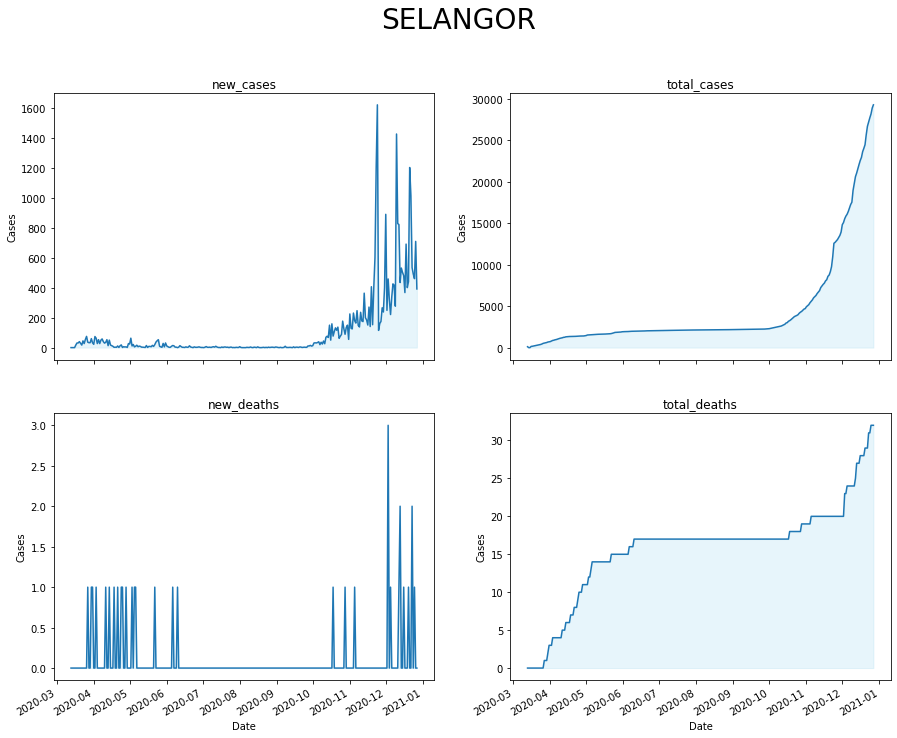

In [219]:
plot_all_out(oriData = df, State = 'SELANGOR')